<a href="https://colab.research.google.com/github/kenedy21/Data-Analysis-Science-ML/blob/main/ml_Bigmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics  import r2_score,mean_squared_error

In [2]:
##load data
traind = pd.read_csv('Train1.csv')
testd= pd.read_csv('Test1.csv')

In [3]:
## check rows and columns
traind.shape,testd.shape

((8523, 12), (5681, 11))

In [4]:
traind.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
#merge datasets to perform eda
traind['source'] = 'train'
testd['source'] = 'test'
data = pd.concat([traind,testd],ignore_index=True)

In [6]:
data 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


In [7]:
## summary of data
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
## check missing values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [9]:
## all columns
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

Print unique values in columns

In [10]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [11]:
data['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

In [12]:
data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [13]:
data['outlet_age'] = 2022 - data['Outlet_Establishment_Year']
                                 

print count values

In [14]:
data['Item_Fat_Content'].count()

14204

In [15]:
data['Outlet_Size'].count()

10188

In [16]:
## mode in outlet size
data['Outlet_Size'].mode()[0]

'Medium'

Replace missing values

In [17]:
data['Outlet_Size'] = data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])

In [18]:
data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].mean())

plotting

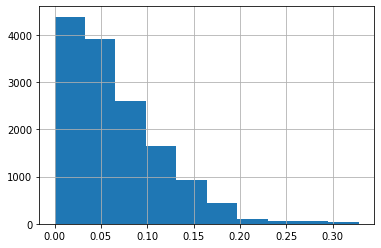

In [19]:
data['Item_Visibility'].hist(bins=10)

Detect outliers

In [20]:
## calculate first and second quartile 
Q1 = data['Item_Visibility'].quantile(0.25)
Q3 = data['Item_Visibility'].quantile(0.75)

In [21]:
## calculate inter_quantile_range iqr
IQR = Q3 - Q1

In [22]:
##Remove outlier and store in fill_data variable
fill_data = data.query('(@Q1 - 1.5 * @IQR) <= Item_Visibility <= (@Q3 + 1.5 * @IQR)')

In [23]:
fill_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,outlet_age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,23
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,24
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test,25
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test,13
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,NaN,test,20
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,NaN,test,15


In [24]:
# modify Item_Visibility by converting into categories ; 
## low,visibility and high
data['Item_Visibility_Bins'] = pd.cut(data['Item_Visibility'],[0.000,0.065,0.13,0.2],
                                      labels = ['low_viz','Viz','High_Viz'])

In [25]:
## count visibility bins
data['Item_Visibility_Bins'].value_counts()

low_viz     7363
Viz         4283
High_Viz    1439
Name: Item_Visibility_Bins, dtype: int64

In [26]:
## Replace null values with low visibility
data['Item_Visibility_Bins'] = data['Item_Visibility_Bins'].replace(np.nan,'low viz',regex = True)

In [27]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(['low fat', 'LF'],'Low Fat')

In [28]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace('reg','Regular')


In [29]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

Encode categorical values using label encoder

In [30]:
le = LabelEncoder()


In [31]:
#transform item fat content
data['Item_Fat_Content'] = le.fit_transform(data['Item_Fat_Content'])

In [32]:
data['Item_Visibility_Bins'] = le.fit_transform(data['Item_Visibility_Bins'])

In [33]:
data['Outlet_Size'] = le.fit_transform(data['Outlet_Size'])

In [34]:
data['Outlet_Location_Type'] = le.fit_transform(data['Outlet_Location_Type'])


In [35]:
dummies = pd.get_dummies(data['Outlet_Type'])
dummies.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [36]:
data['Item_Identifier'].value_counts()

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [37]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x : x[0:2])

In [38]:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
'NC': 'Non-consumable',
'DR': 'Drinks'})

In [39]:
data['Item_Type_Combined'].value_counts()

Food              10201
Non-consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [40]:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined'])

In [41]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Item_Outlet_Sales', 'source', 'outlet_age', 'Item_Visibility_Bins',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_Type_Combined_Drinks',
       'Item_Type_Combined_Food', 'Item_Type_Combined_Non-consumable'],
      dtype='object')

In [42]:
import warnings
warnings.filterwarnings("ignore")

In [43]:
## drop coloumns that have been converted to other types
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

## divide data into train and test
train = data.loc[data.source == 'train']
test = data.loc[data['source'] == 'test']

In [44]:
## drop unnecessary columns
test.drop(['Item_Outlet_Sales','source'], axis=1,inplace = True)
train.drop(['source'],axis=1,inplace=True)

In [45]:
train.to_csv('train_modified.csv')
test.to_csv('test_modified.csv')

In [46]:
trainm = pd.read_csv('train_modified.csv')
testm = pd.read_csv('test_modified.csv')

In [47]:
trainm.dtypes

Unnamed: 0                             int64
Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_MRP                             float64
Outlet_Identifier                     object
Item_Outlet_Sales                    float64
outlet_age                             int64
Item_Visibility_Bins                   int64
Item_Fat_Content_0                     int64
Item_Fat_Content_1                     int64
Outlet_Location_Type_0                 int64
Outlet_Location_Type_1                 int64
Outlet_Location_Type_2                 int64
Outlet_Size_0                          int64
Outlet_Size_1                          int64
Outlet_Size_2                          int64
Outlet_Type_Grocery Store              int64
Outlet_Type_Supermarket Type1          int64
Outlet_Type_Supermarket Type2          int64
Outlet_Type_Supermarket Type3          int64
Item_Type_Combined_Drinks              int64
Item_Type_

In [48]:
## inindependent variable xtrain and depedent variable ytrain
x_train = trainm.drop(['Item_Identifier', 'Outlet_Identifier','Item_Outlet_Sales'],axis=1)
y_train = trainm.Item_Outlet_Sales

In [49]:
testm.dtypes

Unnamed: 0                             int64
Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_MRP                             float64
Outlet_Identifier                     object
outlet_age                             int64
Item_Visibility_Bins                   int64
Item_Fat_Content_0                     int64
Item_Fat_Content_1                     int64
Outlet_Location_Type_0                 int64
Outlet_Location_Type_1                 int64
Outlet_Location_Type_2                 int64
Outlet_Size_0                          int64
Outlet_Size_1                          int64
Outlet_Size_2                          int64
Outlet_Type_Grocery Store              int64
Outlet_Type_Supermarket Type1          int64
Outlet_Type_Supermarket Type2          int64
Outlet_Type_Supermarket Type3          int64
Item_Type_Combined_Drinks              int64
Item_Type_Combined_Food                int64
Item_Type_

In [50]:
x_test = testm.drop(['Item_Identifier','Outlet_Identifier'],axis=1)


In [51]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [52]:
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [53]:
model1 = LinearRegression()

In [54]:
model1.fit(xtrain,ytrain)

LinearRegression()

In [55]:
model1.coef_, model1.intercept_

(array([ 4.83864333e-03, -1.88310791e+00, -6.21639403e+02,  1.56411643e+01,
        -3.21500668e+01, -1.24877464e+01, -2.23721341e+01,  2.23721341e+01,
         1.89041616e+02,  1.50144062e+01, -2.04056022e+02,  5.20129260e+02,
        -2.87817724e+02, -2.32311536e+02, -1.64541434e+03, -1.16184948e+02,
        -3.67083464e+02,  2.12868275e+03, -1.68649532e+01,  1.55035539e+01,
         1.36139930e+00]), 1113.9259934163651)

In [56]:
pred =model1.predict(xtest)

In [57]:
## find RMSE for the model
import math
print(math.sqrt(mean_squared_error(ytest,pred)))

1067.7474977510958


In [58]:
#predict column item outlet sales
y_sales_pred = model1.predict(x_test)
y_sales_pred

array([1812.22238525, 1623.09689923, 1904.70509532, ..., 1909.90656537,
       3639.94086652, 1341.16223205])

In [59]:
test_predictions = pd.DataFrame({
    'Item_Identifier': testm['Item_Identifier'],
    'Outlet_Identfier': testm['Outlet_Identifier'],
    'Item_Outlet_Sales': y_sales_pred,

}, columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [60]:
test_predictions

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,NaN,1812.222385
1,FDW14,NaN,1623.096899
2,NCN55,NaN,1904.705095
3,FDQ58,NaN,2653.668222
4,FDY38,NaN,5193.643157
...,...,...,...
5676,FDB58,NaN,2414.498365
5677,FDD47,NaN,2486.023546
5678,NCO17,NaN,1909.906565
5679,FDJ26,NaN,3639.940867
